<a href="https://colab.research.google.com/github/tingard/kaggle-humpback-whales/blob/master/humpback_whales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humpback whale competition, on Kaggle

In [6]:
!pwd
!pip install kaggle
!mkdir ~/.kaggle

/content


We need to authenticate kaggle - so set up the kaggle.json file (this is definitely not the most secure method)

In [0]:
import json
import getpass
import os
import pandas as pd
from IPython.display import Image
import numpy as np

In [23]:
if not False: # os.path.isfile(os.path.expanduser('~/.kaggle/kaggle.json')):
  key = getpass.getpass('Paste API key here')
  token = {"username":"tingard","key": key}

  with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as file:
      json.dump(token, file)

  !chmod 600 ~/.kaggle/kaggle.json

Paste API key here··········


In [0]:
!mkdir train_images

In [24]:
!cat ~/.kaggle/kaggle.json

{"username": "tingard", "key": "c35066d8bb1c5f37938d13dea9d8ab77"}

In [25]:
!kaggle competitions download -c humpback-whale-identification && unzip train.zip -d train_images > log.log

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 66.9MB/s]
  0% 0.00/594k [00:00<?, ?B/s]
100% 594k/594k [00:00<00:00, 80.4MB/s]
 99% 1.34G/1.35G [00:11<00:00, 123MB/s]
100% 1.35G/1.35G [00:11<00:00, 129MB/s]
100% 4.14G/4.16G [00:44<00:00, 125MB/s]
100% 4.16G/4.16G [00:44<00:00, 99.2MB/s]


In [27]:
os.listdir('.')

['.config',
 'train_images',
 'train.zip',
 'sample_submission.csv',
 'train.csv',
 'test.zip',
 '.kaggle',
 'log.log',
 'sample_data']

### We have our data!

Let's have a look at it

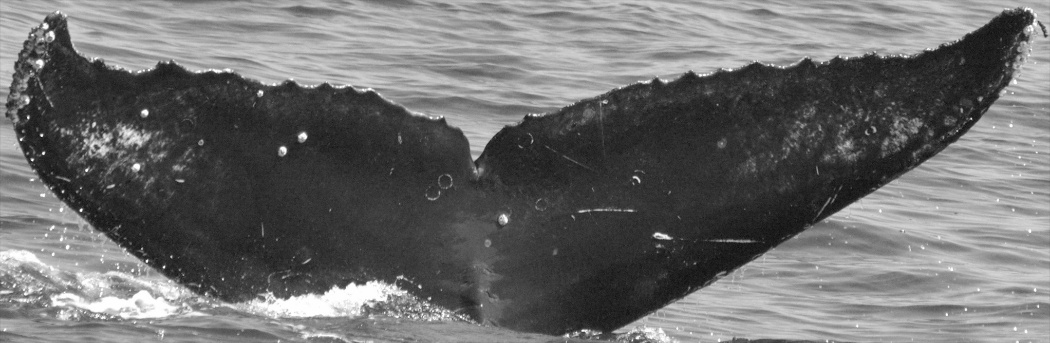

In [26]:
train_images = os.listdir('train_images')
Image(os.path.join('train_images', np.random.choice(train_images)))

In [45]:
sample_submission = pd.read_csv('sample_submission.csv')
training_set = pd.read_csv('train.csv')

training_set.groupby('Id').count().sort_values(by='Image', ascending=False).head(10)

,Image
Id,
new_whale,9664
w_23a388d,73
w_9b5109b,65
w_9c506f6,62
w_0369a5c,61
w_700ebb4,57
w_3de579a,54
w_564a34b,51
w_fd3e556,50


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Approach:

Provide two grey-scale pictures of a whale to a neural network. The network returns if they are the same whale or not (similar to how facial recognition works on phones I guess).

# Architecture
Simple conv2D and pooling setup for now. Can experiment with transfer learning on something bigger at a later date